In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv("/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv")
print(data.head(), "\n")

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375                 15.0        20.0   
1  2013-07-01         6.0     17.8375                 15.0        20.0   
2  2013-07-01         6.0     17.8375                 15.0        20.0   
3  2013-07-01         6.0     17.8375                 15.0        20.0   
4  2013-07-01         6.0     17.8375                 15.0        20.0   

   KielerWoche  Warengruppe      Umsatz  Feiertage  Ferientage  ...  \
0          0.0          1.0  148.828353        0.0         1.0  ...   
1          0.0          2.0  535.856285        0.0         1.0  ...   
2          0.0          3.0  201.198426        0.0         1.0  ...   
3          0.0          4.0   65.890169        0.0         1.0  ...   
4          0.0          5.0  317.475875        0.0         1.0  ...   

   imp_mask_Windgeschwindigkeit  imp_mask_Niederschlag  imp_mask_Wettercode  \
0                             0                  

In [4]:
# Define categorical features
categorical_features = ['Wettercode', 'KielerWoche', 'Warengruppe', 'Feiertage', 'Ferientage', 'Wetterklasse', 'year', 'month', 'weekday', 'day_month', 'season']

# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))

# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')


Wettercode      float64
KielerWoche     float64
Warengruppe     float64
Feiertage       float64
Ferientage      float64
Wetterklasse      int64
year              int64
month             int64
weekday           int64
day_month         int64
season            int64
dtype: object
Unique Values:
 Wettercode      [20.0, 61.0, 5.0, 21.0, 65.0, 63.0, 95.0, 0.0,...
KielerWoche                                            [0.0, 1.0]
Warengruppe                        [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Feiertage                                              [0.0, 1.0]
Ferientage                                             [1.0, 0.0]
Wetterklasse                             [6, 2, 7, 4, 0, 8, 9, 1]
year                         [2013, 2014, 2015, 2016, 2017, 2018]
month                     [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
weekday                                     [0, 2, 3, 6, 4, 1, 5]
day_month       [1, 3, 4, 8, 10, 11, 14, 18, 19, 28, 30, 31, 9...
season                                        

In [5]:
# Encode categorical variables using pd.get_dummies
features = pd.get_dummies(data[categorical_features], drop_first=True, dtype=int)

# Include any numeric columns that are not categorical
features[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Umsatz', 'Niederschlag', 'temp_diff_next_day']] = data[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Umsatz', 'Niederschlag', 'temp_diff_next_day']]

# Construct the prepared data set including the dependent variable ('label')
prepared_data = pd.concat([data[['Umsatz']], features], axis=1).dropna()

print(prepared_data.shape)
prepared_data.head()

(9333, 102)


,Umsatz,Wettercode_3.0,Wettercode_4.0,Wettercode_5.0,Wettercode_10.0,Wettercode_12.0,Wettercode_17.0,Wettercode_20.0,Wettercode_21.0,Wettercode_22.0,...,day_month_31,season_2,season_3,season_4,Bewoelkung,Temperatur,Windgeschwindigkeit,Umsatz,Niederschlag,temp_diff_next_day
0,148.828353,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,148.828353,0.3,-0.9250
1,535.856285,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,535.856285,0.3,-0.9250
2,201.198426,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,201.198426,0.3,-0.9250
3,65.890169,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,65.890169,0.3,-0.9250
4,317.475875,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,317.475875,0.3,2.3125


In [6]:
# Handle missing values by removing rows with any missing values
prepared_data = prepared_data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)
# Display the first few rows of the prepared data set
prepared_data.head()

(9333, 102)


,Umsatz,Wettercode_3.0,Wettercode_4.0,Wettercode_5.0,Wettercode_10.0,Wettercode_12.0,Wettercode_17.0,Wettercode_20.0,Wettercode_21.0,Wettercode_22.0,...,day_month_31,season_2,season_3,season_4,Bewoelkung,Temperatur,Windgeschwindigkeit,Umsatz,Niederschlag,temp_diff_next_day
0,148.828353,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,148.828353,0.3,-0.9250
1,535.856285,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,535.856285,0.3,-0.9250
2,201.198426,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,201.198426,0.3,-0.9250
3,65.890169,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,65.890169,0.3,-0.9250
4,317.475875,0,0,0,0,0,0,1,0,0,...,0,1,0,0,6.0,17.8375,15.0,317.475875,0.3,2.3125


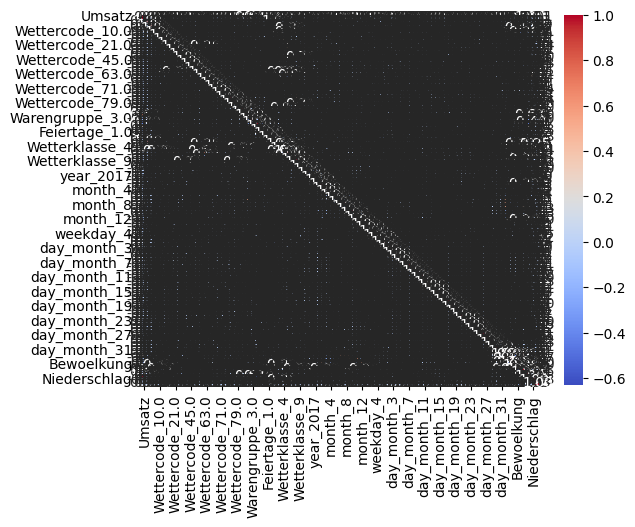

In [7]:
# Compute the correlation matrix
correlation_matrix = prepared_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the heatmap
plt.show()

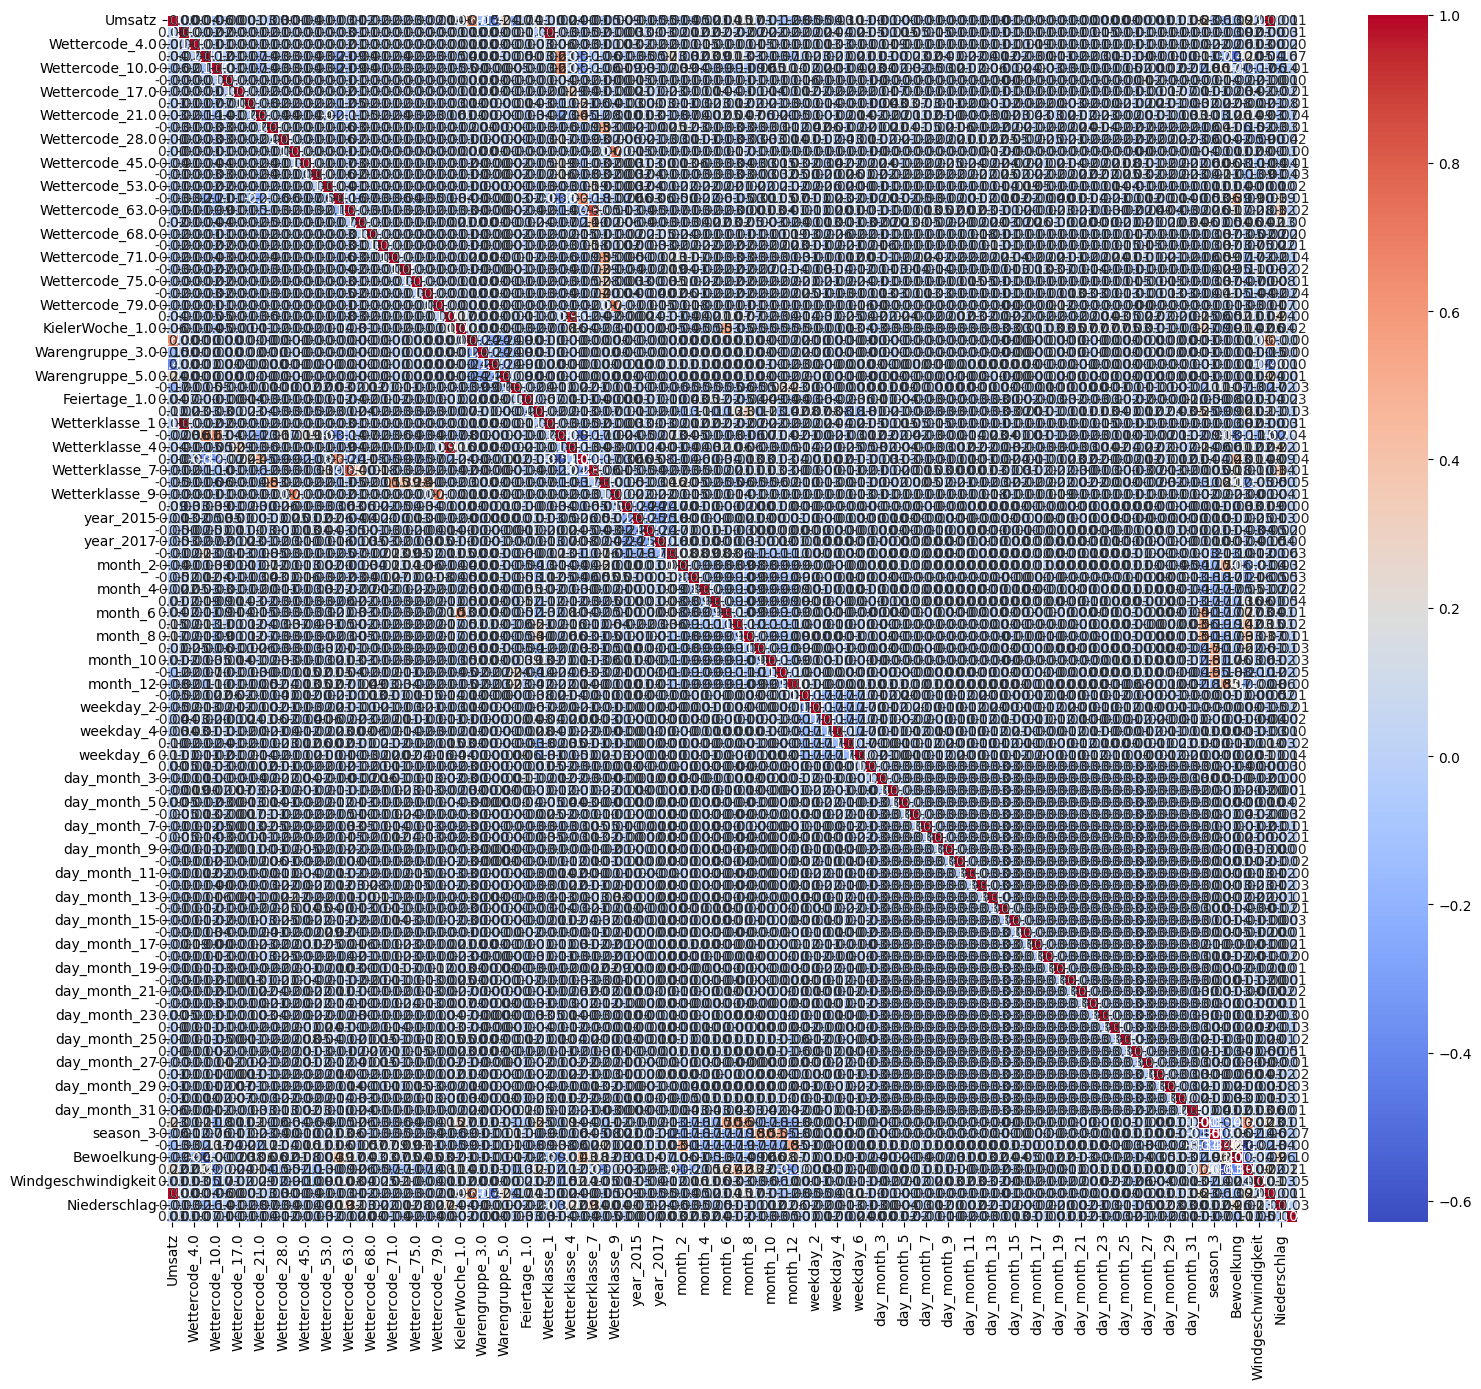

In [8]:
# Compute the correlation matrix
correlation_matrix = prepared_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))  # Adjust the figure size as needed

# Create a heatmap with more space between cells
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Rotate y-axis labels if they are too long
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
plt.show()

In [9]:
# Save the updated data to new CSV files
prepared_data.to_csv('../sourcedata/cleaned_data/8_encoded_variables.csv', sep=',', index=False)

# and save to pickles!
prepared_data.to_pickle('../sourcedata/cleaned_data/8_encoded_variables.pkl')